In [25]:
import sys
import mss
import pandas as pd

# mssmain

In [62]:
path = '../example_data/ex_1.mzML'
scans = mss.mssmain.get_scans(path, ms_all=False, ms_lv=1)
#noise removal
mss.mssmain.noise_removal(scans, 5000)

In [63]:
batch_scan, file_list = mss.mssmain.batch_scans('../example_data/batch', remove_noise=True, thres_noise=1000)

100%|██████████| 6/6 [00:26<00:00,  4.46s/it]


['20180815_Crescent-Creek-Jan_2.mzML', '20180815_Rural-Creek-Jan_3.mzML', '20180815_SR520-Cal-in-DI_10mL_3.mzML', '20181114_SR518-Cal_1000mL_dil-to-1mL_1.mzML', '20181114_SR520-Cal-in-DI_1000mL_dil-to-10mL_3.mzML', '20181114_SwanCreek-Dec_2.mzML']
Batch read finished!


In [64]:
mss.mssmain.peak_pick(scans, 299.6, 1000, enable_score=True)

{2740: [2726, 2773, 1572655.1061197917, 2.675, 1],
 2764: [2726, 2780, 1693305.2631022134, 2.045, 1],
 2789: [2726, 2795, 1841928.0673828123, 0, 1]}

In [65]:
d_test = mss.mssmain.peak_list(scans[:200], 20, enable_score=True)

Generating mz list...
Finding peaks...


100%|██████████| 119/119 [00:03<00:00, 36.40it/s]


Peak processing finished!
Dataframe created!


In [66]:
batch_scan, file_list = mss.mssmain.batch_scans('../example_data/batch')

100%|██████████| 6/6 [00:24<00:00,  4.10s/it]


['20180815_Crescent-Creek-Jan_2.mzML', '20180815_Rural-Creek-Jan_3.mzML', '20180815_SR520-Cal-in-DI_10mL_3.mzML', '20181114_SR518-Cal_1000mL_dil-to-1mL_1.mzML', '20181114_SR520-Cal-in-DI_1000mL_dil-to-10mL_3.mzML', '20181114_SwanCreek-Dec_2.mzML']
Batch read finished!


In [67]:
d_result = mss.mssmain.batch_peak(batch_scan, file_list, 283.1816, 50)
d_result

,rt_max,rt_start,rt_end,peak_area,source
0,3.58,3.56,3.93,3.588069e+05,20180815_Rural-Creek-Jan_3.mzML
1,3.72,3.56,3.93,3.297335e+05,20180815_Rural-Creek-Jan_3.mzML
2,3.84,3.56,3.93,3.478572e+05,20180815_Rural-Creek-Jan_3.mzML
3,16.66,3.56,3.93,1.197044e+05,20180815_Rural-Creek-Jan_3.mzML
4,16.79,3.56,3.93,1.617436e+05,20180815_Rural-Creek-Jan_3.mzML
5,3.68,3.65,3.86,1.162776e+05,20181114_SR518-Cal_1000mL_dil-to-1mL_1.mzML
6,3.86,3.65,3.86,1.212143e+05,20181114_SR518-Cal_1000mL_dil-to-1mL_1.mzML
7,8.53,8.47,8.79,1.001229e+07,20181114_SR520-Cal-in-DI_1000mL_dil-to-10mL_3....
8,8.79,8.47,8.79,1.119287e+07,20181114_SR520-Cal-in-DI_1000mL_dil-to-10mL_3....
9,8.91,8.47,8.79,1.147110e+07,20181114_SR520-Cal-in-DI_1000mL_dil-to-10mL_3....


Alignment usercase is integreated into the mss_processor.py

In [68]:
path = '../example_data/peakdata/mssoutput/'
df = mss.alignment.realignment(path, 'may.2.2020', '.csv', 0.05, 0.015)

Reading in files...
Process completed!
Initial reference built
Alignment beginning..


100%|██████████| 9717/9717 [00:59<00:00, 164.11it/s]


Alignment done!
File saved


# DM module

In [69]:
d_ms = pd.read_csv('../mss/tests/data/sample1114.csv')

In [70]:
keys=['CEC','Blank','ISTD','Wash','Shutdown']
d_sample = mss.dm.data_prep(d_ms,keys,rt_range = [1,30], mz_range = [200,800], area_thres=500)

100%|██████████| 35/35 [01:21<00:00,  2.34s/it]


In [71]:
d_label = mss.dm.ms_cluster(d_sample, ['SR520-Cal'], 'linear', d_reduce=False, visual=False, cluster_method='dbscan', eps=0.6, min_samples=10)

In [72]:
d_label.head()

,Average RT (min),Average m/z,Average sn,Average score,label,20181114_CoulterCreek_1,20181114_CoulterCreek_2,20181114_CoulterCreek_3,20181114_Crescent-Creek-Jan_1,20181114_Crescent-Creek-Jan_2,...,20181114_SR520-Creek_Mix6A_3,20181114_SR520-Creek_Mix6B_1,20181114_SR520-Creek_Mix6B_2,20181114_SR520-Creek_Mix6B_3,20181114_SwanCreek-Dec_1,20181114_SwanCreek-Dec_2,20181114_SwanCreek-Dec_3,20181114_SwanCreek-May_1,20181114_SwanCreek-May_2,20181114_SwanCreek-May_3
index,,,,,,,,,,,,,,,,,,,,,
0,5.696,200.07405,35.03,1,0,3339,2477,3796,4698,3918,...,3769,5471,5255,5571,4397,5408,5311,3060,2645,2647
1,4.326,200.12823,16.90,1,0,1791,2769,2955,2544,1265,...,2000,2429,1507,1572,539,2316,2175,3045,1496,802
2,4.220,200.12869,29.97,1,0,2586,1877,2674,4057,3302,...,2389,2229,2068,4053,1055,2186,1263,1387,2033,2486
3,5.920,200.16484,192.03,1,0,1403,166,137,679,388,...,6572,7230,10364,8871,772,1658,1421,660,474,368
4,5.295,200.20181,23.37,1,0,0,0,0,0,0,...,188,571,232,868,211,141,193,372,96,333


In [73]:
d_trend_calc = mss.dm.trend_calc(d_sample, ['SR520-Cal'], min_size=5, normalization='zscore', visual=False)
d_trend_calc.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,5.696,200.07405,-0.756711,-0.850188,-0.780350,-0.710711,-0.670062,-0.692902,-0.519125,-0.554263,...,-0.386995,-0.430160,-0.452361,0.248938,0.178900,0.252412,1.409237,1.468654,1.347824,0.0
1,4.326,200.12823,-0.580800,-0.704438,-0.662082,-0.640413,-0.673161,-0.673455,-0.504225,-0.684633,...,-0.569329,-0.407747,-0.574623,0.020525,0.229856,0.285939,0.904913,0.237111,1.414759,0.0
2,4.220,200.12869,-0.660521,-0.711015,-0.664794,-0.704215,-0.671180,-0.697231,-0.590776,-0.635527,...,-0.434471,-0.487675,-0.573868,0.405360,-0.051748,0.322475,0.784223,1.648726,0.745675,0.0
3,5.920,200.16484,-0.786337,-0.786739,-0.784041,-0.723960,-0.724931,-0.722043,-0.569850,-0.568530,...,-0.439710,-0.439089,-0.421926,0.057110,0.042211,0.066823,1.103214,1.033178,1.045049,0.0
4,5.295,200.20181,-0.779904,-0.797303,-0.792381,-0.789176,-0.792381,-0.787230,-0.670587,-0.665779,...,-0.501059,-0.233318,-0.294559,0.490464,0.562235,0.521256,1.627018,1.674294,1.604582,0.0


In [74]:
d_test = pd.read_csv('../example_data/clustering/sample0815.csv')
d_model = d_label[d_label['label']!=-1]
d_merge = mss.dm.batch_alignment(d_model,d_test)

In [75]:
dilu_col=['SR520-Cal','SR520_Cal']
d_transpose = mss.dm.transpose(d_merge, dilu_col) # This function is specific to the dataset, will be updated in the future

In [76]:
reg = mss.dm.feature_model(d_transpose, cluster_algorithm=True, model_method='ensemble_bagging_svc', report=False)

D:\python\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



data split finished!
modeling finished!


In [77]:
mss.dm.cluster_pred(reg, d_merge, '20181114_CoulterCreek_1', selected_cluster=[0,1,3,5,7,9], model_merge='weighted_size')

22.061519302615192

# visualization module

In [78]:
mss.visreader.tic_plot(scans)

In [79]:
mss.visreader.ms_plot(scans, 8.47, True)

<Figure size 432x288 with 0 Axes>

In [80]:
result = mss.visreader.mz_locator([1,10,20,30,40,50],49.9999,20)

In [81]:
mss.visreader.formula_mass('C18H22N2O2') == 299.1764085799

True

299.176


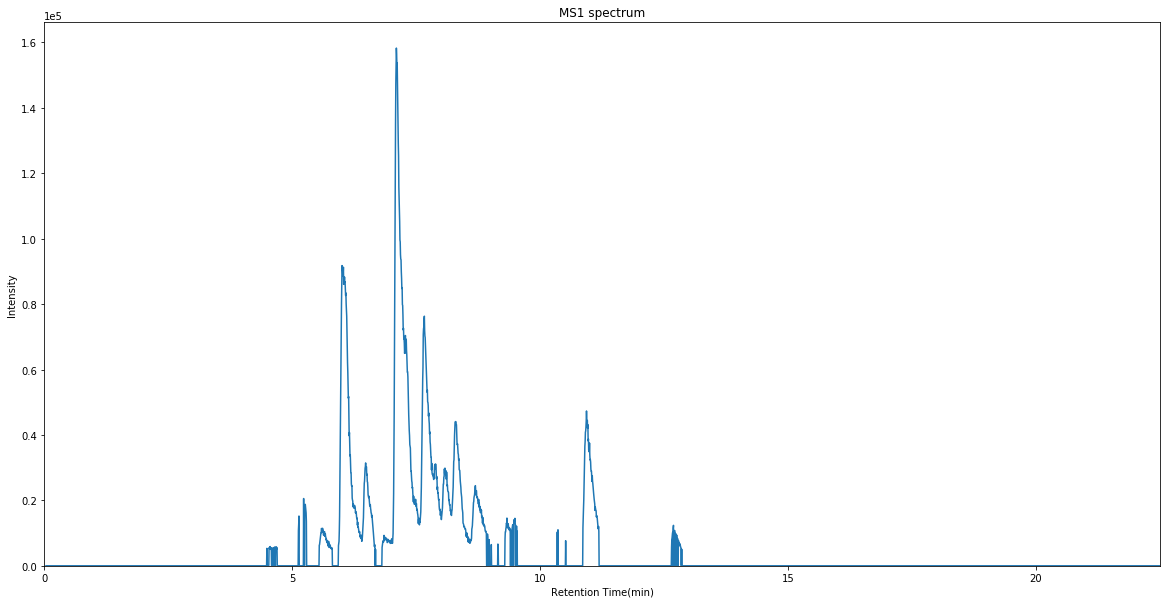

In [82]:
mss.visreader.ms_chromatogram(scans, 'C18H22N2O2', 20, False, 'pos',False,False,'pubchem')

Peak retention time: 5.54 minute, Peak area:  540107.8
Peak retention time: 6.19 minute, Peak area:  30024677.7


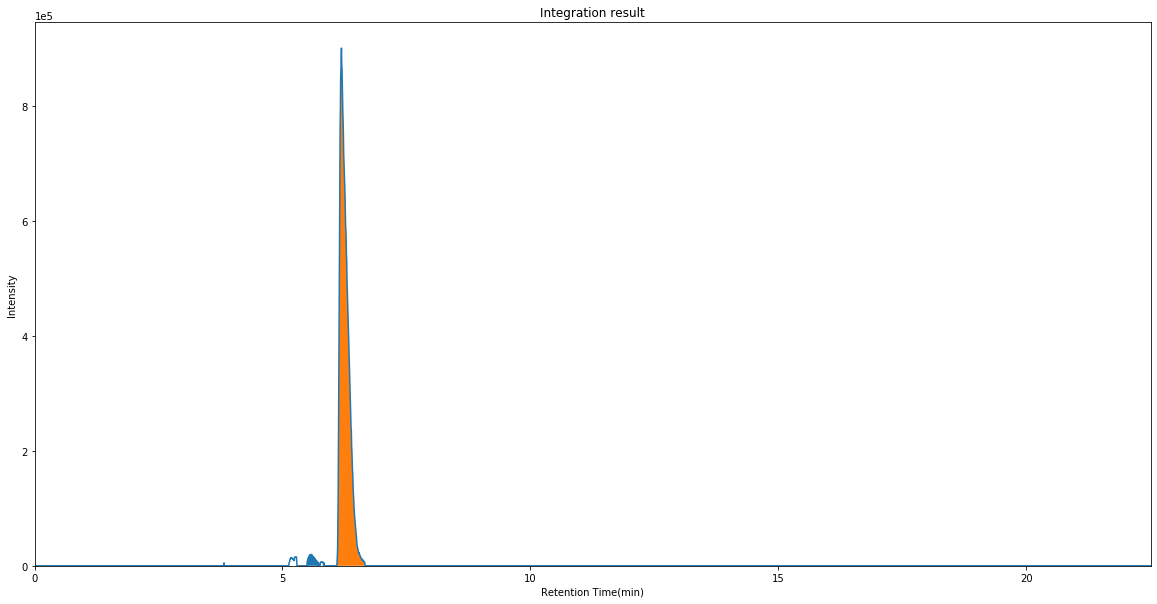

In [83]:
mss.visreader.integration_plot(scans, 175, 5000)

# frag

In [84]:
path = 'D:/UW/massmotif/mzml/DRO_DIE_1ppm_10h_exp1_method_1.mzML'
scan_frag = mss.mssmain.get_scans(path, ms_all=True)

Now showing index 1 of 39 total found scans
Precursor: 251.1982 precursor intensity: 85226.4
Scan time: 14.05 minute


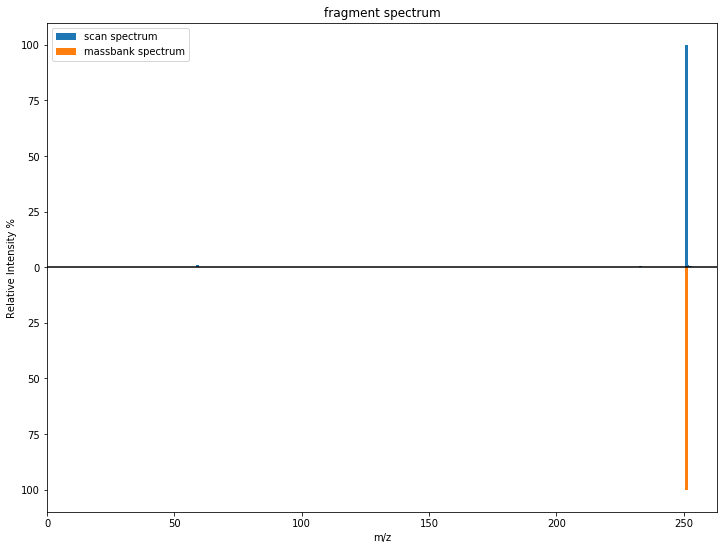

In [85]:
mss.frag.frag_comp(scan_frag, 250, error=5000, scan_index=1, source='MoNA')

In [87]:
df = mss.frag.frag_massbank(scan_frag,241.2142,error=500000)

Now showing index 0 of 5347 total found scans


In [88]:
df

,name,formula,inchiKey,instrument,CE,ionization mode,precursor type,score,url
0,"[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl] (1S,4aR,6aS,6bR,9S,10R,11R,12aR)-1,10,11-trihydroxy-9-(hydroxymethyl)-2,2,6a,6b,9,12a-hexamethyl-1,3,4,5,6,6a,7,8,8a,10,11,12,13,14b-tetradecahydropicene-4a-carboxylate",NA,CMZFNIMQBCBHEX-TXYDQLOPSA-N,LC-ESI-QTOF,40 V,negative,[M-H]-,0.710458,https://mona.fiehnlab.ucdavis.edu/spectra/display/VF-NPL-QTOF005841
1,"[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl] (1S,4aR,6aS,6bR,10R,11R,12aR)-1,10,11-trihydroxy-9,9-bis(hydroxymethyl)-2,2,6a,6b,12a-pentamethyl-1,3,4,5,6,6a,7,8,8a,10,11,12,13,14b-tetradecahydropicene-4a-carboxylate",NA,FSLDBYNJYAUPDI-FIWXFAFXSA-N,LC-ESI-QTOF,40 V,negative,[M-H]-,0.709355,https://mona.fiehnlab.ucdavis.edu/spectra/display/VF-NPL-QTOF005814
2,"[(2S,3R,4S,5R,6S)-6-[[(1aS,1bS,2S,5aR,6S,6aS)-1a-(hydroxymethyl)-2-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-2,5a,6,6a-tetrahydro-1bH-oxireno[5,6]cyclopenta[1,3-c]pyran-6-yl]oxy]-4,5-dihydroxy-2-methyloxan-3-yl] (E)-3-(4-methoxyphenyl)prop-2-enoate",NA,RTCISXKUWWQSRF-FKGKEHBJSA-N,LC-ESI-QTOF,40 V,negative,[M-H]-,0.708718,https://mona.fiehnlab.ucdavis.edu/spectra/display/VF-NPL-QTOF005760
3,scropolioside D,NA,XTDOKCBBQODVJW-LTDPXCIYSA-N,LC-ESI-QTOF,20 V,positive,[M+H]+,0.708287,https://mona.fiehnlab.ucdavis.edu/spectra/display/VF-NPL-QTOF009648
4,"(2R,3R,4R,6aR,6bS,8aR,14bR)-2,3,12-trihydroxy-4,6a,6b,11,11,14b-hexamethyl-8a-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxycarbonyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicene-4-carboxylic acid",NA,NZNHJGNBLPBNLU-YIKANFTBSA-N,LC-ESI-QTOF,10 V,positive,[M+H]+,0.707878,https://mona.fiehnlab.ucdavis.edu/spectra/display/VF-NPL-QTOF000590
5,"(2R,3R,4R,6aR,6bS,8aR,14bR)-2,3,12-trihydroxy-4,6a,6b,11,11,14b-hexamethyl-8a-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxycarbonyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicene-4-carboxylic acid",NA,NZNHJGNBLPBNLU-YIKANFTBSA-N,LC-ESI-QTOF,40 V,positive,[M+H]+,0.705852,https://mona.fiehnlab.ucdavis.edu/spectra/display/VF-NPL-QTOF000592
6,Guanfu base Y,C22H29NO5,XGTNTUKODZZCGL-FDLOETHHSA-N,LC-ESI-QQQ,NA,negative,[M+HCOO]-,0.705272,https://mona.fiehnlab.ucdavis.edu/spectra/display/NGA03819
7,"[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl] (1S,4aR,6aS,6bR,10R,11R,12aR)-1,10,11-trihydroxy-2,2,6a,6b,9,9,12a-heptamethyl-1,3,4,5,6,6a,7,8,8a,10,11,12,13,14b-tetradecahydropicene-4a-carboxylate",NA,CUOZRGBQTOSWAY-IFBFNMMESA-N,LC-ESI-QTOF,40 V,positive,[M+H]+,0.704680,https://mona.fiehnlab.ucdavis.edu/spectra/display/VF-NPL-QTOF005811
8,Deltaline,C27H41NO8,DTTPWCNKTMQMTE-ZRAURUGBSA-N,LC-ESI-QQQ,NA,negative,[M+HCOO]-,0.703252,https://mona.fiehnlab.ucdavis.edu/spectra/display/NGA03856
9,scropolioside D,NA,XTDOKCBBQODVJW-LTDPXCIYSA-N,LC-ESI-QTOF,40 V,negative,[M-H]-,0.702796,https://mona.fiehnlab.ucdavis.edu/spectra/display/VF-NPL-QTOF009646
